In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import plotly.express as px


In [2]:
df_roberta = pd.read_csv(r'/home/gabryel/Documents/examples/python/the_ship_reviews_rb.csv')
df_roberta_tt = pd.read_csv(r'/home/gabryel/Documents/examples/python/the_ship_reviews_tt.csv')
df_gpt = pd.read_csv(r'/home/gabryel/Documents/examples/python/gpt_results.csv', sep=';')

In [3]:
df_roberta.head(5)

,Id,RoBERTa_neg,RoBERTa_neu,RoBERTa_pos,Label,Score,Text
0,1,0.441919,0,0.558081,1,4.0,Went on a sunny day for a Sunday roast with fr...
1,2,0.560968,0,0.439032,-1,5.0,"I recently visited **The Ship**, a charming sp..."
2,3,0.459946,0,0.540054,1,4.0,Stopped by for a pint and a quick lunch. It's ...
3,4,0.441638,0,0.558362,1,5.0,A solid pub on the bank of the Thames you can ...
4,5,0.543905,0,0.456095,-1,5.0,Amazing summer place to have sunday roast of c...


In [4]:
df_roberta_tt.head(5)

,Id,RoBERTa_neg,RoBERTa_neu,RoBERTa_pos,Label,Score,Text
0,1,0.001166,0.007747,0.991086,1,4.0,Went on a sunny day for a Sunday roast with fr...
1,2,0.001117,0.006117,0.992766,1,5.0,"I recently visited **The Ship**, a charming sp..."
2,3,0.003146,0.034881,0.961973,1,4.0,Stopped by for a pint and a quick lunch. It's ...
3,4,0.001493,0.029174,0.969332,1,5.0,A solid pub on the bank of the Thames you can ...
4,5,0.002005,0.006524,0.991471,1,5.0,Amazing summer place to have sunday roast of c...


In [5]:
df_final = pd.merge(
    df_roberta[['Id', 'Label', 'Score', 'Text']],
    df_roberta_tt[['Id', 'Label', 'Score', 'Text']],
    on = 'Id'
)

df_final = pd.merge(
    df_final,
    df_gpt,
    on='Id'
)

df_final

,Id,Label_x,Score_x,Text_x,Label_y,Score_y,Text_y,GPT-Label,Score,Text
0,1,1,4.0,Went on a sunny day for a Sunday roast with fr...,1,4.0,Went on a sunny day for a Sunday roast with fr...,1,4.0,Went on a sunny day for a Sunday roast with fr...
1,2,-1,5.0,"I recently visited **The Ship**, a charming sp...",1,5.0,"I recently visited **The Ship**, a charming sp...",1,5.0,"I recently visited **The Ship**, a charming sp..."
2,3,1,4.0,Stopped by for a pint and a quick lunch. It's ...,1,4.0,Stopped by for a pint and a quick lunch. It's ...,1,4.0,Stopped by for a pint and a quick lunch. It's ...
3,4,1,5.0,A solid pub on the bank of the Thames you can ...,1,5.0,A solid pub on the bank of the Thames you can ...,1,5.0,A solid pub on the bank of the Thames you can ...
4,5,-1,5.0,Amazing summer place to have sunday roast of c...,1,5.0,Amazing summer place to have sunday roast of c...,1,5.0,Amazing summer place to have sunday roast of c...
...,...,...,...,...,...,...,...,...,...,...
95,96,1,4.0,I ordered a 21 day dry aged ribeye steak and I...,1,4.0,I ordered a 21 day dry aged ribeye steak and I...,1,4.0,I ordered a 21 day dry aged ribeye steak and I...
96,97,-1,3.0,Great evening by the river. All very well havi...,1,3.0,Great evening by the river. All very well havi...,-1,3.0,Great evening by the river. All very well havi...
97,98,-1,5.0,Amazing atmosphere!!! The place where to be!! ...,1,5.0,Amazing atmosphere!!! The place where to be!! ...,1,5.0,Amazing atmosphere!!! The place where to be!! ...
98,99,1,5.0,Food is fantastic as well as the staff.,1,5.0,Food is fantastic as well as the staff.,1,5.0,Food is fantastic as well as the staff.


In [6]:
df_final = df_final.drop(['Score_x', 'Text_x', 'Score_y', 'Text_y'], axis = 1)

In [7]:
df_final = df_final.rename(columns={'Label_x':'RoBERTa_Label', 'Label_y':'RoBERTaTT_Label', 'GPT-Label':'GPT_Label'})
df_final

,Id,RoBERTa_Label,RoBERTaTT_Label,GPT_Label,Score,Text
0,1,1,1,1,4.0,Went on a sunny day for a Sunday roast with fr...
1,2,-1,1,1,5.0,"I recently visited **The Ship**, a charming sp..."
2,3,1,1,1,4.0,Stopped by for a pint and a quick lunch. It's ...
3,4,1,1,1,5.0,A solid pub on the bank of the Thames you can ...
4,5,-1,1,1,5.0,Amazing summer place to have sunday roast of c...
...,...,...,...,...,...,...
95,96,1,1,1,4.0,I ordered a 21 day dry aged ribeye steak and I...
96,97,-1,1,-1,3.0,Great evening by the river. All very well havi...
97,98,-1,1,1,5.0,Amazing atmosphere!!! The place where to be!! ...
98,99,1,1,1,5.0,Food is fantastic as well as the staff.


In [19]:
import plotly.express as px


#destribuição de previsões por modelo

fig = px.histogram(df_final[['RoBERTa_Label', 'RoBERTaTT_Label', 'GPT_Label']].melt(), x='value', color='variable', barmode='group',
                   title='Distribuição das previsões',
                   labels={'value': 'Previsão', 'variable': 'Modelo'})
fig.update_xaxes(tickvals=[-1,0, 1], ticktext=['Negativo','Neutro', 'Positivo'])
fig.update_layout(bargap=0.15)
fig.show()


In [9]:
gpt_neutras = df_final[(df_final.GPT_Label == 0)]
gpt_neutras

,Id,RoBERTa_Label,RoBERTaTT_Label,GPT_Label,Score,Text
15,16,-1,1,0,3.0,A popular pub with amazing outdoor space. I ha...
27,28,-1,1,0,4.0,"It is pretty nice, food is nice, service is fa..."
39,40,-1,1,0,3.0,"Sunday roast was a good portion, Yorkshire pud..."
52,53,1,1,0,4.0,A lovely pub with great space and lots of diff...
59,60,-1,1,0,3.0,....friendly -little bit slow and not well org...
61,62,1,1,0,4.0,The burger patties used to be bigger but it's ...


In [10]:
fig = px.histogram(df_final, x='Score', nbins=5, title="Distribuição de avaliação", text_auto=True,
                   labels={'Score':'Avaliação dada pelo cliente'})
fig.update_layout(bargap=0.65)
fig.show()

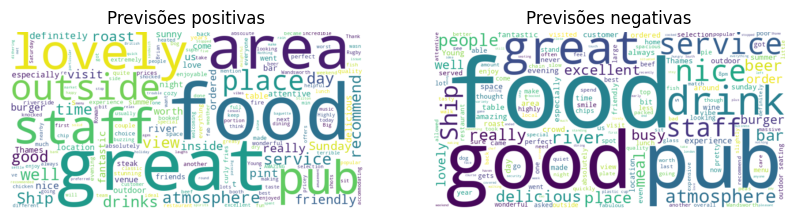

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))

MODEL = 'RoBERTa_Label'

positive_reviews = "".join(df_final[df_final[MODEL] == 1]['Text'])
wordcloud_positive = WordCloud(width = 800, height=400, background_color = 'white').generate(positive_reviews)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Previsões positivas')
plt.axis('off')

negative_reviews = "".join(df_final[df_final[MODEL] == -1]['Text'])
wordcloud_negative = WordCloud(width = 800, height=400, background_color = 'white').generate(negative_reviews)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Previsões negativas')
plt.axis('off')


plt.show()

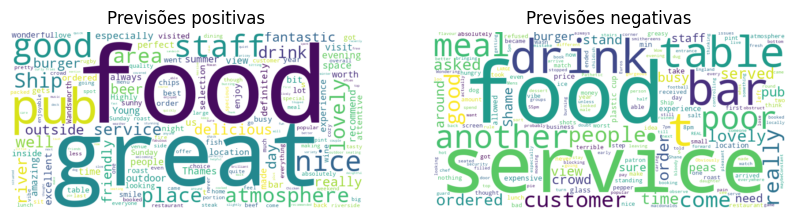

In [12]:
plt.figure(figsize=(10,5))

MODEL = 'RoBERTaTT_Label'

positive_reviews = "".join(df_final[df_final[MODEL] == 1]['Text'])
wordcloud_positive = WordCloud(width = 800, height=400, background_color = 'white').generate(positive_reviews)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Previsões positivas')
plt.axis('off')

negative_reviews = "".join(df_final[df_final[MODEL] == -1]['Text'])
wordcloud_negative = WordCloud(width = 800, height=400, background_color = 'white').generate(negative_reviews)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Previsões negativas')
plt.axis('off')


plt.show()

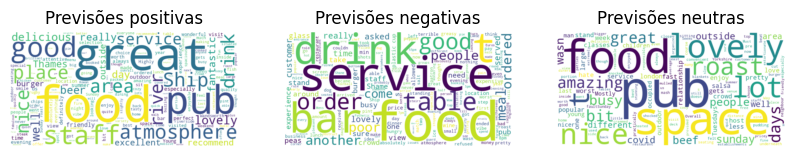

In [13]:
plt.figure(figsize=(10,6))

MODEL = 'GPT_Label'

positive_reviews = "".join(df_final[df_final[MODEL] == 1]['Text'])
wordcloud_positive = WordCloud(width = 800, height=400, background_color = 'white').generate(positive_reviews)
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Previsões positivas')
plt.axis('off')

negative_reviews = "".join(df_final[df_final[MODEL] == -1]['Text'])
wordcloud_negative = WordCloud(width = 800, height=400, background_color = 'white').generate(negative_reviews)
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Previsões negativas')
plt.axis('off')

neutral_reviews = "".join(df_final[df_final[MODEL] == 0]['Text'])
wordcloud_neutral = WordCloud(width = 800, height=400, background_color = 'white').generate(neutral_reviews)
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Previsões neutras')
plt.axis('off')


plt.show()

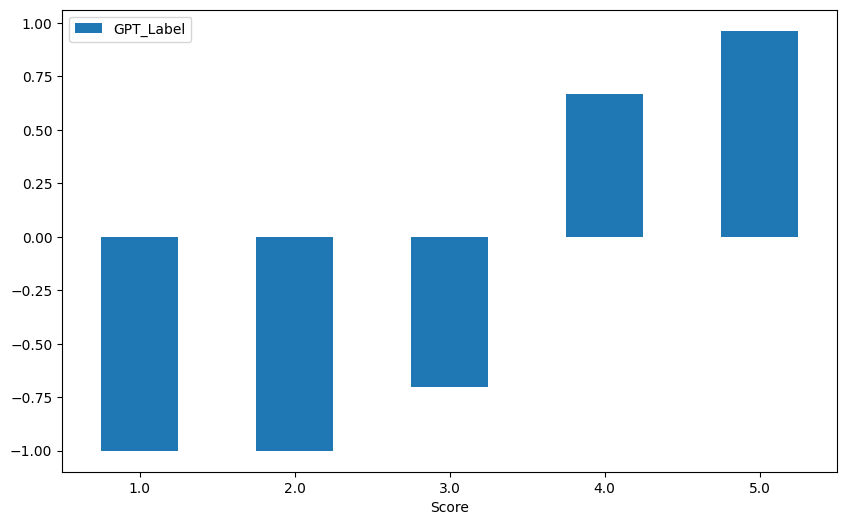

In [16]:
MODEL = 'GPT_Label'
average_sentiment_by_rating = df_final[[MODEL,'Score']].groupby('Score').mean()
fig,ax = plt.subplots(figsize=(10,6))
average_sentiment_by_rating.plot(kind='bar', ax=ax)

plt.xticks(rotation=0)

plt.show()

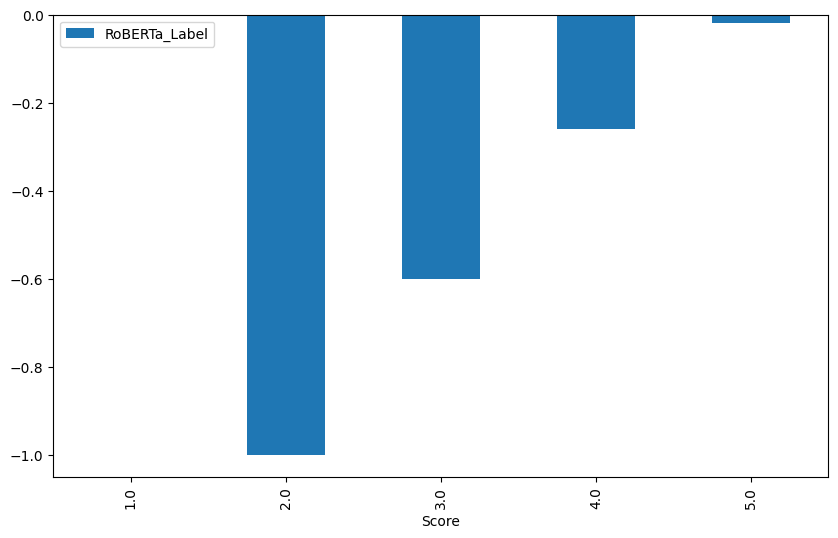

In [17]:
MODEL = 'RoBERTa_Label'
average_sentiment_by_rating = df_final[[MODEL,'Score']].groupby('Score').mean()
fig,ax = plt.subplots(figsize=(10,6))
average_sentiment_by_rating.plot(kind='bar', ax=ax)

plt.show()

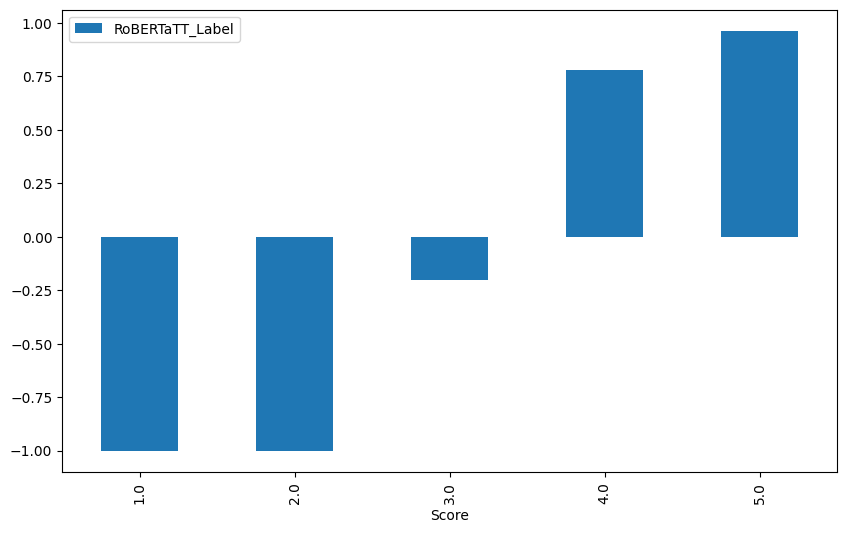

In [18]:
MODEL = 'RoBERTaTT_Label'
average_sentiment_by_rating = df_final[[MODEL,'Score']].groupby('Score').mean()
fig,ax = plt.subplots(figsize=(10,6))
average_sentiment_by_rating.plot(kind='bar', ax=ax)

plt.show()